# network diagram


In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy import stats


plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

# WANT the scores for timelines, the scores for each QUESTION, familiarity with each alignment concept, familiarity with empirical ML, when should we build?

In [5]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

# replace the qualitative data with the quantitative data

In [6]:
df['Q3_1'].value_counts().sort_index()

Know a fair amount    23
Know a little         13
Know it well          50
Name: Q3_1, dtype: int64

In [7]:
timelines_positions = {
    "We should develop more powerful and more general systems as fast as possible": 5,
    "Soon, but not as fast as possible": 3.75,
    "Eventually, but not soon.": 2.5,
    "We should never build AGI": 1.25
}

agreement_swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

familiarity_swaps = {
    "Never heard of it": 1,
    "Heard of it": 2,
    "Know a little": 3,
    "Know a fair amount": 4,
    "Know it well": 5,
}

pre_questions = [f'Q6_{i}' for i in range(1, 10)]
familiarity_questions = [f'Q3_{i}' for i in range(1, 4)]
alignment_familiarity_questions = [f'Q4_{i}' for i in range(1, 5)]
timelines_questions = "Q5"


In [8]:
# get just the df of the questions we care about
df = df[pre_questions + familiarity_questions + alignment_familiarity_questions +  [timelines_questions]]
# df = df[pre_questions + [timelines_questions]]

In [9]:
# replace the strings with numbers
df = df.replace({
    **agreement_swaps,
    **familiarity_swaps,
    **timelines_positions,
})

df

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q3_1,Q3_2,Q3_3,Q4_1,Q4_2,Q4_3,Q4_4,Q5
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,3.0,2.0,1.0,1.0,5.00
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# rename columns Q6_1 -> Q6_9 to "agreement_x"
df = df.rename(columns={k: f"agreement_{i}" for i, k in enumerate(pre_questions, 1)})

# rename columns Q3_1 -> Q3_3 to "familiarity_x"
df = df.rename(columns={k: f"familiarity_{i}" for i, k in enumerate(familiarity_questions, 1)})

# rename columns Q4_1 -> Q4_4 to "alignment_x"
df = df.rename(columns={k: f"alignment_{i}" for i, k in enumerate(alignment_familiarity_questions, 1)})

# rename Q5 to "timelines"
df = df.rename(columns={timelines_questions: "timelines"})

In [11]:
df.columns

Index(['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4',
       'agreement_5', 'agreement_6', 'agreement_7', 'agreement_8',
       'agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3',
       'alignment_1', 'alignment_2', 'alignment_3', 'alignment_4',
       'timelines'],
      dtype='object')

In [12]:
# drop the rows with NaN
df = df.dropna()
df

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,alignment_1,alignment_2,alignment_3,alignment_4,timelines
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,3.75
100,5.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,1.25
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,3.0,2.0,1.0,1.0,5.00


In [13]:
# make a correlation matrix
corr = df.corr()

In [14]:
corr

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,alignment_1,alignment_2,alignment_3,alignment_4,timelines
agreement_1,1.000000,-0.005166,-0.313766,0.221374,0.331513,0.230755,-0.287302,0.299694,-0.244608,0.197432,0.230830,0.208287,-0.089539,-0.272186,-0.136741,-0.011493,0.090855
agreement_2,-0.005166,1.000000,0.125002,-0.076401,-0.237088,-0.172930,0.326589,0.046617,0.107865,-0.068511,0.171893,-0.073315,-0.023520,0.119472,0.066707,0.112756,-0.040233
agreement_3,-0.313766,0.125002,1.000000,0.013704,-0.034143,-0.046094,0.174299,0.079469,0.084881,-0.161909,-0.115639,-0.123525,-0.045934,0.240925,0.135891,0.039442,0.029439
agreement_4,0.221374,-0.076401,0.013704,1.000000,0.463062,0.418361,-0.018712,-0.152006,-0.038145,0.153567,0.122498,0.033165,-0.112858,-0.181108,-0.192520,-0.116757,0.028849
agreement_5,0.331513,-0.237088,-0.034143,0.463062,1.000000,0.655633,-0.223534,-0.023160,-0.138537,0.086674,0.061441,0.065975,-0.103275,-0.212554,-0.233049,-0.225995,0.306709
agreement_6,0.230755,-0.172930,-0.046094,0.418361,0.655633,1.000000,-0.262518,-0.054194,-0.293925,0.220134,0.031725,0.053144,-0.119116,-0.250714,-0.304825,-0.104666,0.253310
agreement_7,-0.287302,0.326589,0.174299,-0.018712,-0.223534,-0.262518,1.000000,0.049621,0.274273,-0.083249,0.120282,-0.104462,0.037964,0.215934,0.172085,0.183766,-0.212192
agreement_8,0.299694,0.046617,0.079469,-0.152006,-0.023160,-0.054194,0.049621,1.000000,-0.058687,-0.018718,0.057306,0.049685,-0.107069,0.032843,0.057444,0.078068,0.236042
agreement_9,-0.244608,0.107865,0.084881,-0.038145,-0.138537,-0.293925,0.274273,-0.058687,1.000000,-0.042031,-0.058254,-0.003448,-0.055983,0.056483,0.092733,0.004860,-0.185231
familiarity_1,0.197432,-0.068511,-0.161909,0.153567,0.086674,0.220134,-0.083249,-0.018718,-0.042031,1.000000,0.600556,0.391326,0.156405,0.106696,0.092794,0.053319,0.016290


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(corr, rows, columns, rename_map, 
                           figsize=(4, 3),
                           cmap='RdBu_r',
                           output_path=None,
                           font_sizes={'large': 12, 'medium': 10, 'small': 8}):
    """
    Create a publication-ready correlation heatmap with customizable font sizes.
    
    Args:
        corr (pd.DataFrame): Correlation matrix
        rows (list): Row indices to select
        columns (list): Column indices to select
        rename_map (dict): Mapping for renaming rows/columns
        figsize (tuple): Figure size in inches
        cmap (str): Colormap name
        output_path (str): If provided, save figure to this path
        font_sizes (dict): Dictionary with keys 'large', 'medium', 'small' for different text elements
    """
    # Set style for clean, minimal look
    plt.style.use('../style.mplstyle')
    
    # Extract and rename the correlation submatrix
    submatrix = corr.loc[rows, columns]
    
    # Rename rows and columns using the mapping
    submatrix.index = [rename_map.get(idx, idx) for idx in submatrix.index]
    submatrix.columns = [rename_map.get(col, col) for col in submatrix.columns]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set font sizes
    plt.rc('font', family='serif')
    plt.rc('axes', labelsize=font_sizes['medium'])  # Axis labels
    plt.rc('xtick', labelsize=font_sizes['small'])  # Tick labels
    plt.rc('ytick', labelsize=font_sizes['small'])
    
    # Create heatmap
    im = sns.heatmap(submatrix, 
                     cmap=cmap,
                     vmin=-0.4, 
                     vmax=0.4,
                     center=0,
                     annot=True,
                     fmt='.2f',
                     annot_kws={'size': font_sizes['small']},  # Correlation values
                     square=True,
                     cbar_kws={'label': 'Pearson Correlation'},
                     ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), size=font_sizes['medium'])
    ax.set_yticklabels(ax.get_yticklabels(), size=font_sizes['medium'])
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    ax.set_title("Correlations between AI Safety\n Knowledge and Tool Beliefs", 
             pad=20,  # Adds some padding above the title
             size=font_sizes['large'])
    # Add significance stars
    for i in range(len(rows)):
        for j in range(len(columns)):
            val = submatrix.iloc[i, j]
            # Example significance levels (you should replace with actual p-values)
            if abs(val) > 0.3:
                stars = '***'
            elif abs(val) > 0.2:
                stars = '**'
            elif abs(val) > 0.1:
                stars = '*'
            else:
                continue
            ax.text(j + 0.5, i + 0.75, stars, 
                   ha='center', va='bottom', 
                   color='black', size=font_sizes['small'])
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save if path provided
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        
    return fig, ax

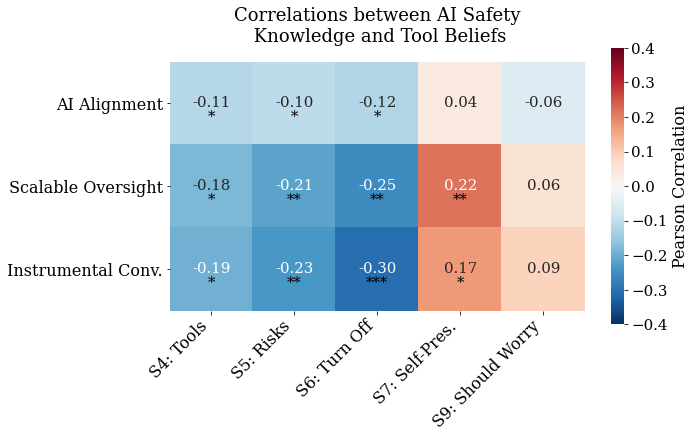

In [32]:
custom_font_sizes = {
    'large': 18,    # For titles or main labels
    'medium': 16,   # For axis labels
    'small': 15      # For tick labels, correlation values, and stars
}
# rows = ['familiarity_1', 'familiarity_2', 'familiarity_3']
rows = ['alignment_1', 'alignment_2', 'alignment_3']
columns = ['agreement_4', 'agreement_5', 'agreement_6' , 'agreement_7', 'agreement_9']
rename_map = {
    'alignment_1': 'AI Alignment',
    'alignment_2': 'Scalable Oversight',
    'alignment_3': 'Instrumental Conv.',
    'agreement_4': 'S4: Tools',
    'agreement_5': 'S5: Risks',
    'agreement_6': 'S6: Turn Off',
    'agreement_7': 'S7: Self-Pres.',
    'agreement_9': 'S9: Should Worry'
}

fig, ax = plot_correlation_heatmap(corr, rows, columns, rename_map, font_sizes=custom_font_sizes, figsize=(10, 6), cmap='RdBu_r', output_path=None)


In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(corr, rows, columns, rename_map, 
                           figsize=(4, 3.5),  # Slightly taller to accommodate labels
                           cmap='RdBu_r',
                           output_path=None,
                           font_sizes={'large': 12, 'medium': 10, 'small': 8}):
    """
    Create correlation heatmap with grouped variables.
    New parameters:
    - tool_beliefs: list of column names for tool-AI beliefs
    - agent_beliefs: list of column names for agent-AI beliefs
    """
    
    # Extract and rename the correlation submatrix
    submatrix = corr.loc[rows, columns]
    submatrix.index = [rename_map.get(idx, idx) for idx in submatrix.index]
    submatrix.columns = [rename_map.get(col, col) for col in submatrix.columns]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create heatmap
    im = sns.heatmap(submatrix, 
                     cmap=cmap,
                     vmin=-0.4, 
                     vmax=0.4,
                     center=0,
                     annot=True,
                     fmt='.2f',
                     annot_kws={'size': font_sizes['small']},
                     square=True,
                     cbar_kws={'label': 'Pearson Correlation'},
                     ax=ax)
    
    # Set font sizes
    ax.set_xticklabels(ax.get_xticklabels(), size=font_sizes['medium'])
    ax.set_yticklabels(ax.get_yticklabels(), size=font_sizes['medium'])
    
    # Add dividing line after tool beliefs (assuming first 3 columns are tool beliefs)
    ax.axvline(x=3, color='black', linewidth=3, alpha=1)
    
    # Add group labels
    fig.text(0.50, 0.95, 'AI-as-Tool Beliefs', 
             ha='center', 
             size=font_sizes['medium'],
             style='italic')
    fig.text(0.72, 0.95, 'AI-as-Agent Beliefs', 
             ha='center', 
             size=font_sizes['medium'],
             style='italic')
    
    # Significance stars
    for i in range(len(rows)):
        for j in range(len(columns)):
            val = submatrix.iloc[i, j]
            if abs(val) > 0.3:
                stars = '***'
            elif abs(val) > 0.2:
                stars = '**'
            elif abs(val) > 0.1:
                stars = '*'
            else:
                continue
            ax.text(j + 0.5, i + 0.85, stars, 
                   ha='center', va='bottom', 
                   color='black', size=font_sizes['small'])
    
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        
    return fig, ax

# Example usage:
"""
columns = [
    # Tool beliefs
    'agreement_4',  # S4: Tools without goals
    'agreement_5',  # S5: Risks overstated  
    'agreement_6',  # S6: Can turn off
    # Agent beliefs
    'agreement_7',  # S7: Self-preservation
    'agreement_9'   # S9: Should worry
]
"""

"\ncolumns = [\n    # Tool beliefs\n    'agreement_4',  # S4: Tools without goals\n    'agreement_5',  # S5: Risks overstated  \n    'agreement_6',  # S6: Can turn off\n    # Agent beliefs\n    'agreement_7',  # S7: Self-preservation\n    'agreement_9'   # S9: Should worry\n]\n"

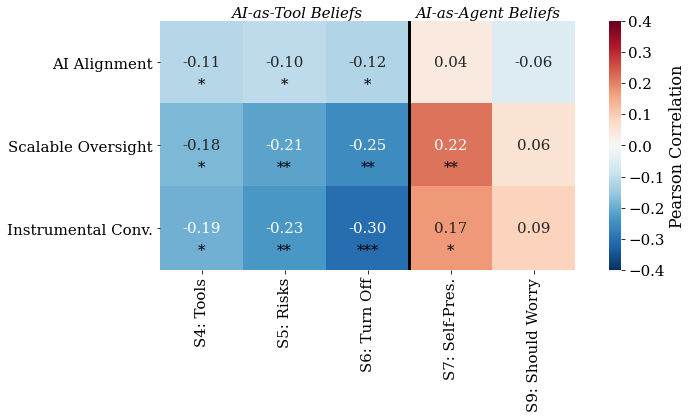

In [59]:
custom_font_sizes = {
    'large': 20,    # For titles or main labels
    'medium': 15,   # For axis labels
    'small': 15      # For tick labels, correlation values, and stars
}
# rows = ['familiarity_1', 'familiarity_2', 'familiarity_3']
rows = ['alignment_1', 'alignment_2', 'alignment_3']
columns = ['agreement_4', 'agreement_5', 'agreement_6' , 'agreement_7', 'agreement_9']
rename_map = {
    'alignment_1': 'AI Alignment',
    'alignment_2': 'Scalable Oversight',
    'alignment_3': 'Instrumental Conv.',
    'agreement_4': 'S4: Tools',
    'agreement_5': 'S5: Risks',
    'agreement_6': 'S6: Turn Off',
    'agreement_7': 'S7: Self-Pres.',
    'agreement_9': 'S9: Should Worry'
}

fig, ax = plot_correlation_heatmap(corr, rows, columns, rename_map, font_sizes=custom_font_sizes, figsize=(12, 6), cmap='RdBu_r', output_path='figs/correlation_heatmap.pdf')

In [17]:
    # Add legend
    # legend_elements = [
    #     Line2D([0], [0], color='blue', lw=2, label='Positive correlation'),
    #     Line2D([0], [0], color='red', lw=2, label='Negative correlation'),
    #     plt.scatter([], [], c='#add8e6', label='Tool AI beliefs'),
    #     plt.scatter([], [], c='#ffcba4', label='AI-as-an-agent beliefs'),
    #     plt.scatter([], [], c='#d3d3d3', label='Familiarity with Alignment')
    # ]
    
    # ax.legend(handles=legend_elements, 
    #          loc='center left',
    #          bbox_to_anchor=(1, 0.5),
    #          fontsize=sizes['small_size'])